In [72]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [44]:
df['SalePrice'].min()

34900

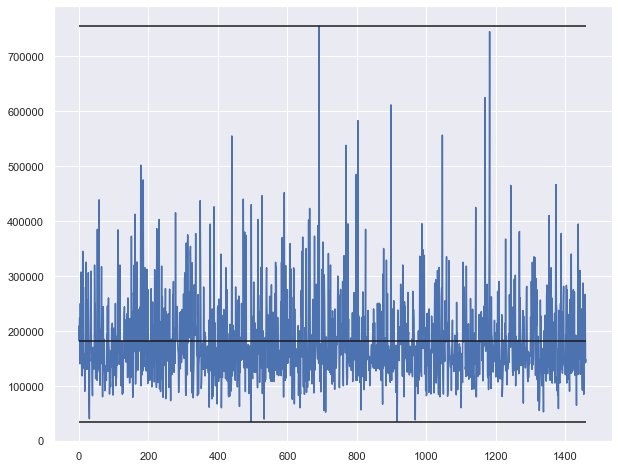

In [57]:
plt.figure(figsize=(10,8))
plt.plot(df['SalePrice'], zorder=1)
plt.hlines(df['SalePrice'].min(), xmin=0, xmax=1460)
plt.hlines(df['SalePrice'].max(), xmin=0, xmax=1460)
plt.hlines(df['SalePrice'].mean(), xmin=0, xmax=1460, zorder=2)

Prepping data to model:

In [8]:
num_cols = list(df.dtypes[df.dtypes != 'object'].index)

In [9]:
df_num = df[num_cols]

In [10]:
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [17]:
summary = pd.DataFrame(df_num.dtypes,columns=['dtypes'])
summary = summary.reset_index()
summary['Name'] = summary['index']
summary = summary[['Name','dtypes']]
summary['Missing'] = df_num.isnull().sum().values    
summary['Uniques'] = df_num.nunique().values

Dataset Shape: (1460, 38)


In [18]:
summary

,Name,dtypes,Missing,Uniques
0,Id,int64,0,1460
1,MSSubClass,int64,0,15
2,LotFrontage,float64,259,110
3,LotArea,int64,0,1073
4,OverallQual,int64,0,10
5,OverallCond,int64,0,9
6,YearBuilt,int64,0,112
7,YearRemodAdd,int64,0,61
8,MasVnrArea,float64,8,327
9,BsmtFinSF1,int64,0,637


In [21]:
df_num.dropna(axis=1, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
target = 'SalePrice'
used_cols = list(col for col in df_num.columns.to_list() if col not in [target, 'Id'])

X = df_num[used_cols]
y = df_num[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=42)

In [33]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Modeling:

In [58]:
# Model-less baseline
y_mean_train = y_train.mean()

baseline_y_pred_train = ([y_mean_train]*len(y_train))
baseline_y_pred_test = ([y_mean_train]*len(y_test))

In [71]:
print(f"Training R2: {r2_score(y_train, baseline_y_pred_train)}")
print(f"Testing R2: {r2_score(y_test, baseline_y_pred_test)}")
print("---")
print(f"Training MAE: {mean_absolute_error(y_train, baseline_y_pred_train)}")
print(f"Testing MAE: {mean_absolute_error(y_test, baseline_y_pred_test)}")

Training R2: 0.0
Testing R2: -1.9765701703589045e-05
---
Training MAE: 56415.950564776824
Testing MAE: 59592.07556279647


In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

In [61]:
len(y_pred_test)

482

In [40]:
print(f"Training R2: {r2_score(y_train, y_pred_train)}")
print(f"Testing R2: {r2_score(y_test, y_pred_test)}")
print("---")
print(f"Training MAE: {mean_absolute_error(y_train, y_pred_train)}")
print(f"Testing MAE: {mean_absolute_error(y_test, y_pred_test)}")

Training R2: 0.8077421070813382
Testing R2: 0.7806408594154468
---
Training MAE: 21214.57938573137
Testing MAE: 24255.845000385987


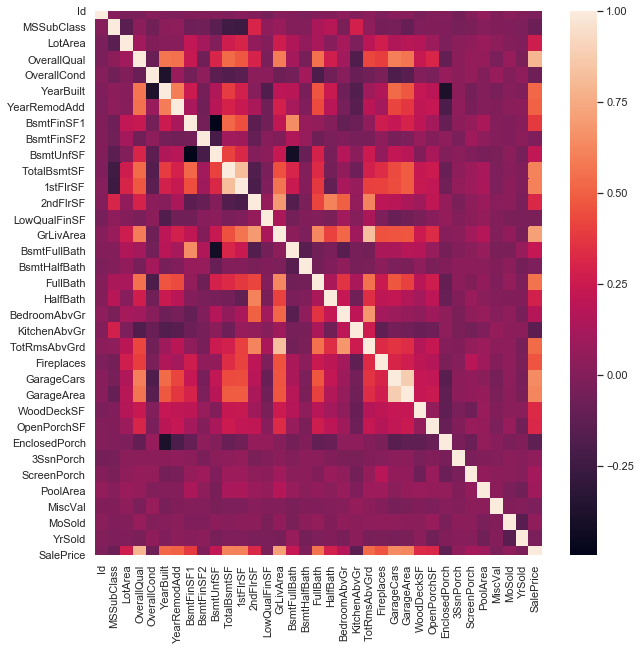

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df_num.corr())
plt.show()

In [73]:
ridge = Ridge(random_state=42)

In [74]:
ridge.fit(X_train_scaled, y_train)

ridge_y_pred_train = ridge.predict(X_train_scaled)
ridge_y_pred_test = ridge.predict(X_test_scaled)

In [75]:
print(f"Training R2: {r2_score(y_train, ridge_y_pred_train)}")
print(f"Testing R2: {r2_score(y_test, ridge_y_pred_test)}")
print("---")
print(f"Training MAE: {mean_absolute_error(y_train, ridge_y_pred_train)}")
print(f"Testing MAE: {mean_absolute_error(y_test, ridge_y_pred_test)}")

Training R2: 0.8077401253767008
Testing R2: 0.7806225954250052
---
Training MAE: 21200.764116853657
Testing MAE: 24244.663403493225
